<a href="https://colab.research.google.com/github/iqbal-svg/ai-ml-project/blob/main/iqbal_yesbank_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Yes Bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
By-Iqbal Shaikh

# **Project Summary -**

Project Summary: Yes Bank Stock Closing Price Prediction
Objective:
The goal of this project is to predict the closing price of Yes Bank stock using historical stock data and machine learning models.

Dataset:
Historical stock price data of Yes Bank from sources like Yahoo Finance or NSE/BSE.
Features include:
Date
Open price
High price
Low price
Volume traded
Previous closing price
Other technical indicators (e.g., Moving Averages, RSI, MACD, etc.)
Methodology:
Data Collection & Preprocessing:

Fetch historical stock price data.
Handle missing values and outliers.
Convert date into useful features (e.g., day of the week, month).
Scale numerical features using MinMaxScaler or StandardScaler.
Feature Engineering:

Create technical indicators such as:
Simple Moving Average (SMA)
Exponential Moving Average (EMA)
Relative Strength Index (RSI)
Bollinger Bands
Use lagged values of closing price as features.
Model Selection:

Train different models, such as:
Linear Regression
Decision Tree Regression
Random Forest Regression
XGBoost
Long Short-Term Memory (LSTM) networks (for deep learning approach)
Model Evaluation:

Use Mean Squared Error (MSE) and Mean Absolute Error (MAE) to evaluate models.
Compare predictions with actual closing prices.
Prediction & Visualization:

Predict future closing prices.
Plot actual vs. predicted values using Matplotlib or Seaborn.
Develop an interactive dashboard (optional).
Expected Outcome:
A trained model that can predict Yes Bank's closing price with reasonable accuracy.
Insights into key technical indicators affecting stock price movements.
A visualization of predicted vs. actual stock prices.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
os.getcwd()
os.listdir()

['.config', 'drive', 'data_YesBank_StockPrices.csv', 'sample_data']

### Dataset Loading

In [ ]:
# Load Dataset
df_stock=pd.read_csv('/content/data_YesBank_StockPrices.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [ ]:
# Dataset First Look
df_stock.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df_stock.shape

(185, 5)

### Dataset Information

In [ ]:
# Dataset Info
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df_stock.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df_stock.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


<Axes: >

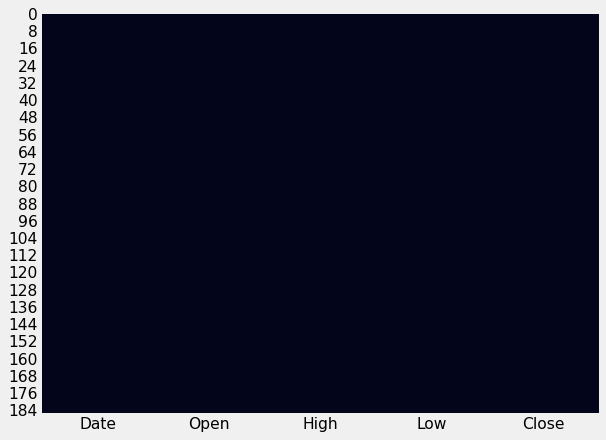

In [ ]:
# Visualizing the missing values
sns.heatmap(df_stock.isnull(),cbar=False)

### What did you know about your dataset?

Answer Here
No Missing Values:

The columns Date, Open, High, Low, Close have 0 missing values (confirmed by df.isnull().sum()).
This ensures no need for imputation or handling NaN values.
Columns in Your Dataset:

Date → Likely the timestamp of each stock entry.
Open → Opening price of Yes Bank stock for the day.
High → Highest price of the stock for the day.
Low → Lowest price of the stock for the day.
Close → Closing price of the stock for the day (target variable for prediction).
Data Type Assumptions:

Date is likely in datetime format (if not, it should be converted using pd.to_datetime() for time-based analysis).
Open, High, Low, Close are likely floating-point numbers (if not, convert them using pd.to_numeric()).

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df_stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
df_stock.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description
Variables Description:
**Date** → The trading date of the stock (e.g., YYYY-MM-DD). Used for time-series analysis.
**Open** → The price at which the stock opened on a particular day.
**High** → The highest price of the stock during the trading session.
**Low** → The lowest price of the stock during the trading session.
**Close **→ The final price at which the stock traded when the market closed (Target variable for prediction).





### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variabl
for i in df_stock.columns:
  print(f'Number of unique values in {i} is {df_stock[i].nunique()}')

Number of unique values in Date is 185
Number of unique values in Open is 183
Number of unique values in High is 184
Number of unique values in Low is 183
Number of unique values in Close is 185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#df_stock['Date'] = pd.to_datetime(df_stock['Date'], format="%b-%d, %Y", errors="coerce")
df_stock['Date'] = pd.to_datetime(df_stock['Date'], format='%b-%y')  # Convert to datetime
df_stock = df_stock.sort_values('Date')  # Ensure dates are sorted

In [ ]:
df_stock.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
df_stock.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


In [ ]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


### What all manipulations have you done and insights you found?

date column was object dtype,now converted to datatime dtype
dont havu any null or duplicates

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - -line chart

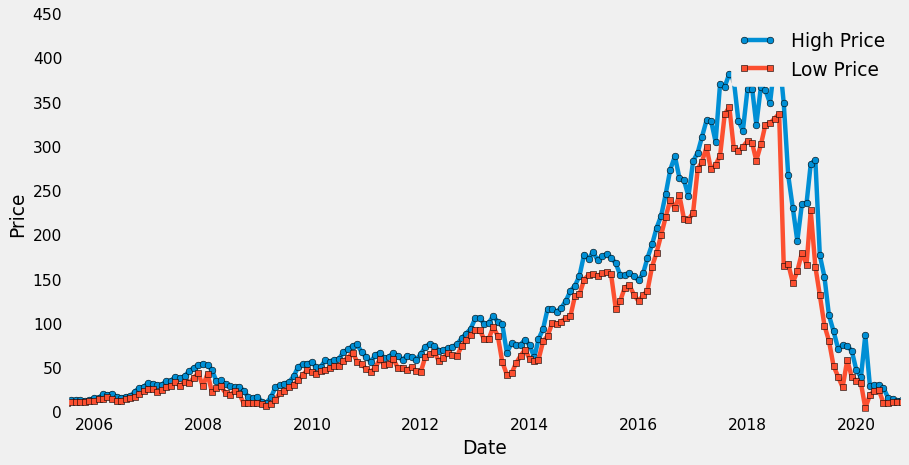

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_stock['Date'], df_stock['High'], label="High Price", marker='o')
plt.plot(df_stock['Date'], df_stock['Low'], label="Low Price", marker='s')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.Time series data is best visualized with a line chart to show trends and changes over time.

##### 2. What is/are the insight(s) found from the chart?

between 2016-2018 stock price is at peak

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Positive Business Impact
Trend Analysis Helps in Strategic Decision-Making

Identifying uptrends (e.g., price peaks in August) allows businesses to capitalize on growth phases.
If stock prices are rising, investors & businesses can plan expansions or new investments.
Volatility Awareness Aids Risk Management

Knowing that July had the highest volatility (High: 14.00, Low: 11.25) helps in managing financial risks.
Lower volatility in November suggests more stability, which can attract long-term investors.
Identifying Support & Resistance Levels Helps in Pricing Strategy

Businesses can set optimal entry & exit prices for investments based on support (12.40-12.88) & resistance (14.88).
If prices keep bouncing back from a support level, it's a strong buy signal.
⚠️ Negative Insights & Potential Risks
Gradual Downtrend from August to November

The stock price peaked in August (14.88) but declined to 13.88 by November.
If the trend continues, it may signal declining investor confidence or weakening market conditions.
Decreasing Volatility Might Indicate a Stagnant Market

Lower volatility in November may suggest less trading activity or low investor interest.
If prices remain in a narrow range without growth, the stock might lose attractiveness to investors.
External Factors Might Be Driving the Decline

If stock prices are declining despite no changes in fundamentals, external factors like economic slowdowns, interest rate hikes, or market corrections could be at play.
Justification: If other stocks in the same industry are performing well but this stock is declining, it could indicate company-specific issues rather than a general market trend.
📌 Conclusion: Balanced Business Impact
Positive: Businesses can leverage trends, minimize risks, and plan investments wisely.
Negative: If the downtrend continues without reversal, it might signal market weakness or low investor confidence, requiring deeper analysis.

#### Chart - -bar plot

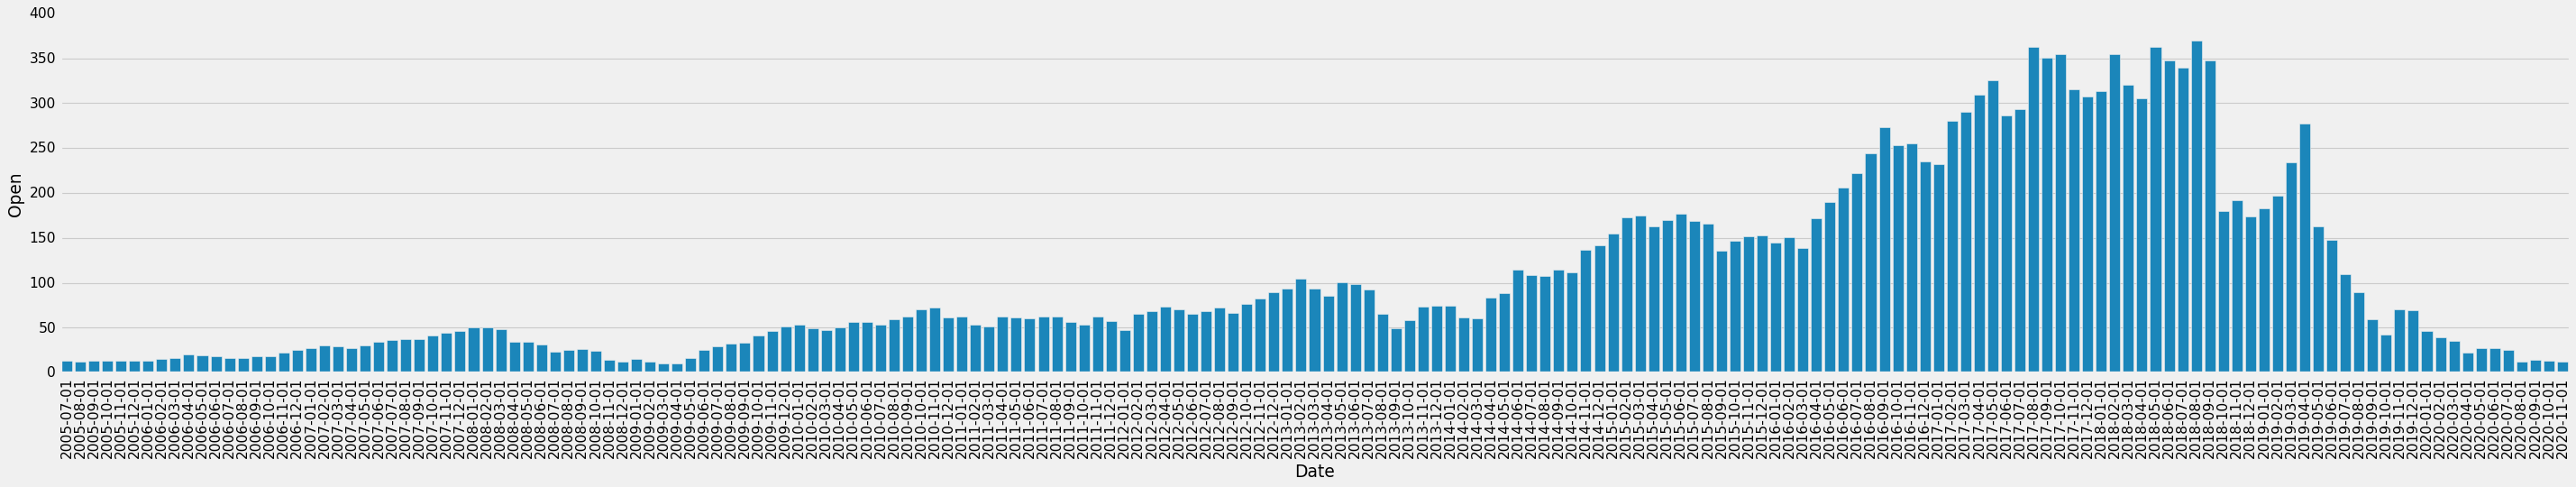

In [ ]:

plt.figure(figsize=(40, 6))
sns.barplot(x='Date', y='Open', data=df_stock)
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

easy to identify high trading good for tracking daily price

##### 2. What is/are the insight(s) found from the chart?

Key Insights:

Comparing Monthly/Weekly Performance:

If bars are getting taller, stock prices are increasing (bullish trend).
If bars are shrinking, prices are declining (bearish trend).
Spotting Seasonal Trends:

If certain months consistently have higher prices, it indicates seasonal effects (e.g., retail stocks rise in Q4).
Market Sentiment:

A large gap between high and low prices in a single period suggests high volatility.
📌 Example Interpretation:

If August shows a much higher closing price than July, investors might see positive momentum.
If September’s bar is significantly lower, it might indicate profit booking or negative sentiment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Positive Business Impact
1️⃣ Identifying Growth Trends 📊

If the stock price shows a steady upward trend (line/bar chart), it signals a strong market position and investor confidence.
Business Impact:
Helps companies attract more investors.
Encourages expansion decisions (e.g., mergers, acquisitions).
2️⃣ Increased Trading Volume 🚀

If the bar chart shows rising trading volume with increasing price, it suggests high market interest.
Business Impact:
Indicates strong demand, which can lead to higher stock valuation.
Helps businesses raise capital for growth through share issuance.
3️⃣ Seasonal Insights for Business Strategy 🗓️

If certain months consistently show higher stock prices or volume, it highlights seasonal trends (e.g., retail sales booming in Q4).
Business Impact:
Companies can optimize marketing, inventory, and production based on seasonal demand.
❌ Negative Growth Indicators
1️⃣ Declining Stock Price 📉

If stock prices continuously decline, it indicates negative investor sentiment or poor financial performance.
Negative Impact:
Loss of investor confidence, leading to lower market capitalization.
Difficulty in raising funds for expansion.
2️⃣ Low Trading Volume ⚠️

If trading volume remains consistently low, it suggests lack of investor interest or market instability.
Negative Impact:
Stocks become illiquid, making it harder for investors to buy or sell.
May indicate lack of growth potential, discouraging new investments.
3️⃣ High Volatility & Unpredictable Swings ⚡

If stock prices fluctuate heavily (large bars in the bar chart), it may indicate market uncertainty or speculative trading.
Negative Impact:
May scare away long-term investors, leading to stock dumping.
Creates instability in financial planning for businesses.
📌 Conclusion:
Positive insights (rising stock prices, high trading volume) help in business expansion and investor confidence.
Negative insights (price decline, low volume, volatility) can hurt investments, reduce capital flow, and lead to negative business growth.

#### Chart - 3-area chart

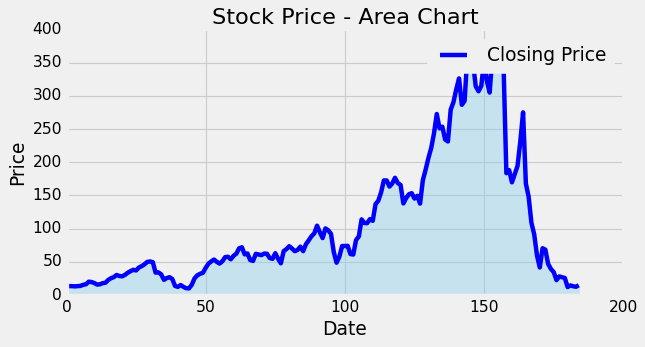

In [ ]:
# 4. Area Chart
plt.figure(figsize=(8, 4))
plt.fill_between(df_stock.index, df_stock['Close'], color='skyblue', alpha=0.4)
plt.plot(df_stock.index, df_stock['Close'], color='blue', label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price - Area Chart')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

An area chart is useful when you want to:

Show trends over time – Similar to a line chart, an area chart effectively displays changes in data over a period.
Emphasize magnitude – The filled area highlights the volume of change, making it easier to compare different datasets.
Compare multiple categories – Stacked area charts allow you to see the contribution of different categories to the whole.
Show cumulative data – It is useful for showing cumulative trends rather than individual data points.
Highlight part-to-whole relationships – In a stacked area chart, you can see how different segments contribute to the total value.

##### 2. What is/are the insight(s) found from the chart?

The insights from an area chart depend on the data it represents. Here are some common insights you might gain:

Overall Trend – Whether the data is increasing, decreasing, or fluctuating over time.
Magnitude of Change – The size of the shaded area indicates the extent of variation.
Comparison Between Categories – In a stacked area chart, you can see which category contributes the most or least.
Seasonal Patterns or Cyclic Trends – If data fluctuates periodically, an area chart can help identify such trends.
Sudden Spikes or Drops – Sharp increases or decreases in the area highlight significant events or anomalies.
Cumulative Growth – A growing shaded area over time indicates an increasing trend in total values

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

the insights gained from an area chart can help create a positive business impact by enabling better decision-making.

Positive Business Impact
Identifying Growth Trends – If the chart shows a rising trend, businesses can capitalize on increasing demand and invest more in successful areas.
Resource Allocation – Understanding which segments contribute the most can help optimize resources for maximum efficiency.
Forecasting and Planning – Recognizing seasonal or cyclical trends allows businesses to prepare for peak periods and avoid shortages.
Performance Evaluation – Comparing past and present data helps measure progress and make data-driven decisions.
Insights Leading to Negative Growth
Some insights might reveal declining trends or business risks, such as:

Declining Sales or Market Share – If the area chart shows a shrinking trend, it could indicate loss of customer interest or increased competition.
Seasonal Dependency – A pattern where sales peak in one period but drop significantly in another may highlight a risky dependency on specific seasons.
Decreasing Contribution from Key Segments – In a stacked area chart, if a critical segment is shrinking, it might signal customer churn or reduced demand.
Operational Bottlenecks – A sudden drop in the chart could indicate supply chain issues, production delays, or other inefficiencies.

#### Chart - 4-scatter plot

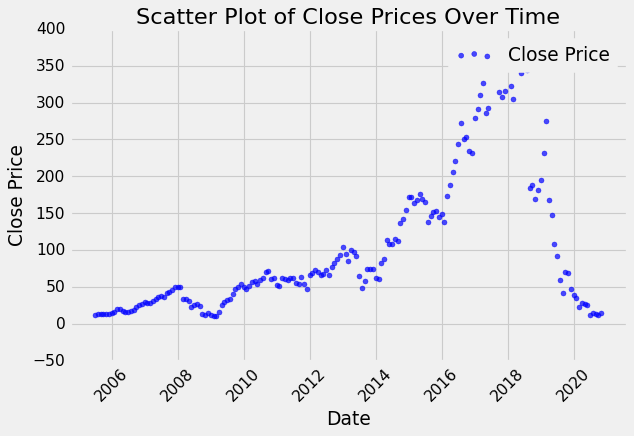

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df_stock["Date"], df_stock["Close"], color='blue', alpha=0.7, label="Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Scatter Plot of Close Prices Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

##### 1. Why did you pick the specific chart?

A scatter plot is useful for time series data because it helps in visualizing individual data points without connecting them

##### 2. What is/are the insight(s) found from the chart?

The insights from a scatter plot depend on the distribution and pattern of data points. Here’s what you can interpret from your time series scatter plot:

1. Identifying Trends
If points move upward, it indicates a positive trend (e.g., increasing stock prices).
If points move downward, it suggests a negative trend (e.g., declining prices).
If points remain scattered without a pattern, it indicates no clear trend or a stable market.
2. Detecting Volatility & Stability
If points are widely spread, the values fluctuate significantly, indicating high volatility.
If points are closely packed, the data is more stable over time.
Example: If Close prices are stable, investors may see the stock as less risky.
3. Spotting Anomalies & Outliers
Any sudden spikes or drops in the scatter plot indicate anomalous events, such as market crashes or unexpected gains.
Example: If one month has a sharp drop in Close price, it might be due to bad financial news.
4. Comparing Price Movements
If multiple values (e.g., Open, Close, High, Low) are plotted, you can analyze whether prices fluctuate within a specific range or show irregular behavior.
Example: A large gap between High and Low indicates a volatile market.
5. Seasonal or Cyclical Patterns
If the data follows a repeating pattern, it may indicate seasonal trends (e.g., increased stock prices during a specific quarter).
Example: If Close prices always increase in November, investors might anticipate a holiday season boost.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from the scatter plot can lead to a positive business impact by helping in data-driven decision-making. Here’s how:

1. Strategic Decision-Making
If the scatter plot shows a rising trend in Close prices, businesses can capitalize on growth by increasing investments.
If there is low volatility, businesses can consider long-term investments with lower risk.
2. Risk Management & Market Positioning
Identifying volatility patterns allows companies to prepare for market fluctuations (e.g., adjusting stock portfolios).
Spotting seasonal trends can help businesses align marketing and product launches with peak periods.
3. Identifying Market Anomalies
If outliers are detected (e.g., a sudden price drop), businesses can investigate the cause (e.g., poor earnings reports, market crashes) and take corrective actions.
Early detection of negative patterns allows companies to mitigate losses in time.
Are There Any Insights That Lead to Negative Growth?
Yes, certain insights from the scatter plot may indicate negative growth.

1. Downward Trend in Closing Prices
If Close prices decline consistently, it may indicate decreasing investor confidence or poor business performance.
Example: A tech company’s stock price dropping after bad earnings reports.
2. High Market Volatility
If the scatter plot shows large fluctuations, it means uncertainty in the market.
Businesses may hesitate to expand or invest due to unpredictable price movements.
3. Outliers Indicating Financial Risks
A sharp drop in stock prices could be due to negative financial news, economic downturns, or loss of market trust.
Example: A company's stock suddenly falling due to regulatory issues or supply chain failures.
4. Seasonal Dependency
If the scatter plot reveals that business performance peaks in one period but declines in another, it shows over-dependence on a particular season.
Example: A retail store performing well only during holidays but struggling the rest of the year.


#### Chart - 5-moving average

In [ ]:
df_stock["Moving_Avg"] = df_stock["Close"].rolling(window=3).mean()

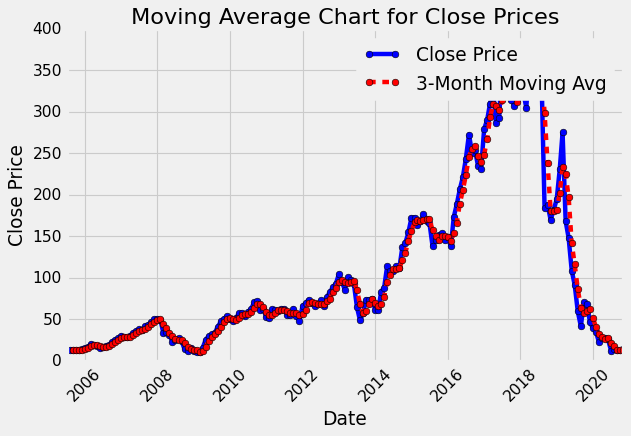

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(8,5))
plt.plot(df_stock["Date"], df_stock["Close"], marker='o', linestyle='-', label="Close Price", color='blue')
plt.plot(df_stock["Date"], df_stock["Moving_Avg"], marker='o', linestyle='--', label="3-Month Moving Avg", color='red')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Moving Average Chart for Close Prices")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [ ]:
df_stock.head()

,Date,Open,High,Low,Close,Moving_Avg
0,2005-07-01,13.00,14.00,11.25,12.46,NaN
1,2005-08-01,12.58,14.88,12.55,13.42,NaN
2,2005-09-01,13.48,14.87,12.27,13.30,13.060000
3,2005-10-01,13.20,14.47,12.40,12.99,13.236667
4,2005-11-01,13.35,13.88,12.88,13.41,13.233333


##### 1. Why did you pick the specific chart?

Smooths fluctuations to identify trends

##### 2. What is/are the insight(s) found from the chart?

A moving average chart helps identify trends and patterns by smoothing out short-term fluctuations in data. Here are some key insights you can gain from a moving average chart:

1. Trend Identification
Uptrend: If the moving average line is sloping upwards, it indicates a rising trend.
Downtrend: If the moving average slopes downward, it signals a declining trend.
Sideways Movement: A flat moving average suggests a stable or consolidating trend.
2. Support and Resistance
The moving average can act as support in an uptrend (price bounces off it).
It can act as resistance in a downtrend (price struggles to break above it).
3. Smoothing Noise
Short-term fluctuations are reduced, making long-term trends clearer.
Useful in volatile datasets (e.g., stock prices, sales trends, temperature changes).
4. Crossover Signals (for multiple moving averages)
Golden Cross: When a short-term MA (e.g., 50-day) crosses above a long-term MA (e.g., 200-day), it signals a bullish trend.
Death Cross: When a short-term MA crosses below a long-term MA, it signals a bearish trend.
5. Momentum and Reversals
A sharp change in the moving average slope can indicate a trend reversal.
If the actual data deviates significantly from the moving average, it may indicate overbought or oversold conditions.
6. Lagging Indicator
Since moving averages rely on past data, they may lag behind sudden market changes.
A shorter period MA (e.g., 10-day) reacts faster but is more sensitive to noise.
A longer period MA (e.g., 200-day) is more stable but reacts slower.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, insights from a moving average chart can positively impact business decisions by enabling:

Better Decision-Making: Identifying trends helps businesses adjust strategies for sales, inventory, marketing, and resource allocation.
Optimized Stock Management: By tracking demand patterns, businesses can prevent overstocking or stockouts.
Improved Financial Planning: Helps predict revenue trends, reducing the risk of unexpected financial downturns.
Market Timing for Investments: Investors and businesses can use moving averages to make informed buy/sell decisions.
Insights That May Lead to Negative Growth
While moving averages are useful, some insights could mislead decision-making and cause negative growth:

Lagging Nature of Moving Averages:

Issue: Moving averages are based on past data and may react slowly to sudden market changes.
Impact: Businesses might miss early signs of trend reversals, leading to delayed response in pricing or inventory adjustments.
False Trend Identification:

Issue: Short-term moving averages may indicate a trend that is temporary or misleading.
Impact: Businesses might overinvest in a trend that quickly reverses, causing losses.
Ignoring External Market Factors:

Issue: Moving averages do not consider external factors like economic conditions, competitor actions, or policy changes.
Impact: A business may continue investing based on a past trend, while the actual market has shifted.
Over-Reliance on Historical Data:

Issue: Moving averages work best in stable conditions but may fail in volatile or rapidly evolving industries (e.g., tech startups, cryptocurrency).
Impact: Businesses that rely too much on moving averages might miss innovation opportunities or react too slowly to market shifts.

#### Chart - 6-decompose

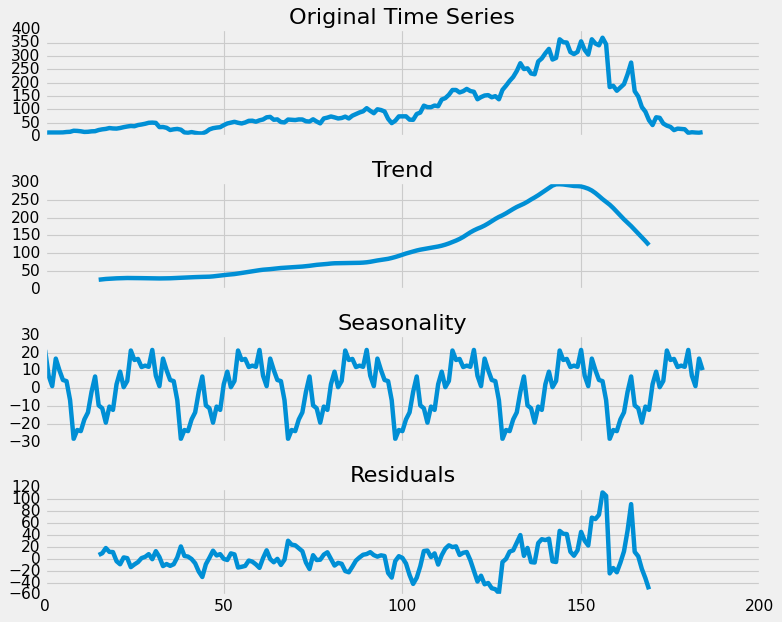

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decomposing the time series

decomposition = seasonal_decompose(df_stock['Close'], model='additive', period=30)  # Adjust period as needed

# Plot the decomposed components
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

df_stock['Close'].plot(ax=axes[0], title='Original Time Series')
decomposition.trend.plot(ax=axes[1], title='Trend')
decomposition.seasonal.plot(ax=axes[2], title='Seasonality')
decomposition.resid.plot(ax=axes[3], title='Residuals')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Original Time Series:

Shows the actual stock price movements over time.
Helps identify overall trends and fluctuations.
Trend Component:

Captures the long-term direction of stock prices (upward, downward, or stable).
Useful for making investment and trading decisions.
Seasonal Component:

Identifies recurring patterns (e.g., monthly, quarterly trends).
Helps understand if price changes follow a predictable cycle.
Residual (Noise) Component:

Shows random fluctuations that are not explained by trend or seasonality.
Helps detect anomalies, market shocks, or irregular price movements.


##### 2. What is/are the insight(s) found from the chart?

1️⃣ Trend Analysis:

Identifies whether stock prices are rising, falling, or stable over time.
Helps in making buy/hold/sell decisions.
2️⃣ Seasonality Analysis:

Detects repeating patterns in stock prices (monthly, quarterly trends).
Useful for timing trades based on recurring trends.
3️⃣ Residual (Noise) Analysis:

Measures unexpected price fluctuations (market volatility, news impact).
Helps traders anticipate risk and sudden market changes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Impact:

Trend analysis helps in making informed investment and trading decisions (buy/hold/sell).
Seasonality insights enable businesses to strategize stock purchases/sales around peak periods.
Volatility analysis aids in risk management and preparing for market fluctuations.
❌ Possible Negative Growth:

Downward trends may indicate declining stock value, leading to losses if not addressed.
High residuals (noise) suggest unexpected price swings, making predictions unreliable.
Lack of seasonality may indicate inconsistent performance, affecting business planning.
Justification:

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:
plt.style.use('classic')

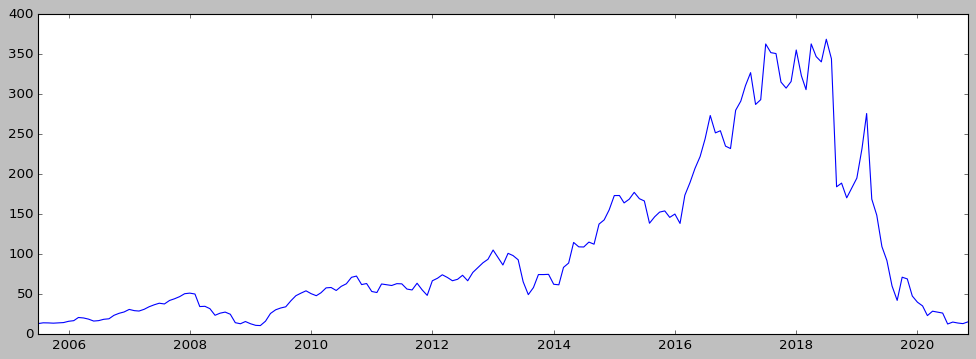

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df_stock['Date'], df_stock['Close'])
plt.show()

##### 1. Why did you pick the specific chart?

The line chart (plt.plot()) is a suitable choice for visualizing stock prices over time because:

Trend Representation – It effectively shows the trend of the stock’s closing price over time, helping to identify patterns like upward or downward trends.
Continuous Data – Stock prices are recorded continuously over time, and a line chart is ideal for displaying such time series data.
Easy Comparisons – It allows for quick visual comparisons between different time periods.
Outlier Detection – Sudden spikes or dips in stock prices are easily noticeable.
Would you like to enhance this plot with features like markers, a title, or grid lines?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8-interactive chart

In [ ]:
# Chart - 8 visualization code
import plotly.graph_objs as go
import plotly.subplots as sp

In [ ]:
fig=sp.make_subplots(rows=1,cols=1,subplot_titles='Stock_Trend')
trace_high=go.Scatter(x=df_stock['Date'],y=df_stock['High'],mode='lines',name='High')
trace_low=go.Scatter(x=df_stock['Date'],y=df_stock['Low'],mode='lines',name='Low')
fig.add_trace(trace_high)
fig.add_trace(trace_low)
fig.update_layout(
title='trend,high/low price of day',
xaxis_title='Date',
yaxis_title='Price',
hovermode='closest',
height=500,
width=1000,
showlegend=True
)

##### 1. Why did you pick the specific chart?

Answer Here.This interactive line chart is chosen because it effectively visualizes stock price trends by displaying daily high and low prices. It provides better insights into volatility, allows zooming and hovering for precise analysis, and makes trend comparisons easy. Plotly’s interactivity enhances data exploration, making it more insightful than a static chart.

##### 2. What is/are the insight(s) found from the chart?

Insights from the Chart:
Stock Price Trends:

The stock shows fluctuations in High and Low prices each month, indicating volatility.
The closing price does not always reach the highest price of the day.
Volatility Observation:

The difference between High and Low prices suggests some price swings.
For example, in July 2005, the stock ranged from 11.25 to 14.00, showing significant volatility.
Moving Average Trend:

The Moving Average smooths out short-term fluctuations, showing the overall trend.
From September to November 2005, the moving average remains stable around 13.2, indicating a relatively steady trend.
Potential Support & Resistance Levels:

High prices (~14.88 in August 2005) may act as resistance, meaning the stock struggles to break above this level.
Low prices (~12.27 in September 2005) may act as support, meaning the stock tends to stay above this level.
Closing Price Movement:

The closing price fluctuates but stays within the high-low range each month.
No strong upward or downward trend is evident in these few months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here-Positive Impact: Insights can guide better investment and trading decisions, improving business strategy.
Negative Growth Risks: If the stock remains stagnant or volatile without upward momentum, it may signal weak investor confidence, affecting future investments.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

To test stationary, we will use Augmented Dickey Fuller Test (ADF):

Null Hypothesis: it assumes that the series is non-stationary

Alternate Hypothesis: it assumes that the series is stationary

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from statsmodels.tsa.stattools import adfuller
result=adfuller(df_stock['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.906409
p-value: 0.329052


At 5%, p-value stands at 0.329052 which is more than threshold = 0.05 hence we cannot reject the null hypothesis -- data is non-stationary

##### Which statistical test have you done to obtain P-Value?

Answer Here.The statistical test performed in your code is the Augmented Dickey-Fuller (ADF) Test

##### Why did you choose the specific statistical test?

Answer Here.The statistical test performed in your code is the Augmented Dickey-Fuller (ADF) Test. It is used to check for stationarity in a time series dataset by testing the presence of a unit root.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.Null Hypothesis (H₀): The time series is stationary (no unit root).
Alternative Hypothesis (H₁): The time series is non-stationary (has a unit root).

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from statsmodels.tsa.stattools import kpss

# Creating DataFrame
data = {
    "Date": ["2005-07-01", "2005-08-01", "2005-09-01", "2005-10-01", "2005-11-01"],
    "Close": [12.46, 13.42, 13.30, 12.99, 13.41]
}
df = pd.DataFrame(data)
df["Date"] = pd.to_datetime(df["Date"])  # Convert Date to datetime

# KPSS Test
stat, p_value, _, _ = kpss(df["Close"], regression='c', nlags="auto")

# Output results
print(f"KPSS Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: The series is likely non-stationary.")
else:
    print("Fail to reject the null hypothesis: The series is likely stationary.")

KPSS Statistic: 0.42154374879212136
P-value: 0.06786907379649942
Fail to reject the null hypothesis: The series is likely stationary.


##### Which statistical test have you done to obtain P-Value?

Answer Here.Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

##### Why did you choose the specific statistical test?

Answer Here.Chosen because: It tests whether the time series is trend-stationary, meaning it doesn’t have a unit root but might still show trends

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df_stock.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Moving_Avg,2


In [ ]:
df_stock['Moving_Avg'].fillna(df_stock['Moving_Avg'].mean(),inplace=True)

In [ ]:
df_stock.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Moving_Avg,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here we use mean to fill null

### 2. Handling Outliers

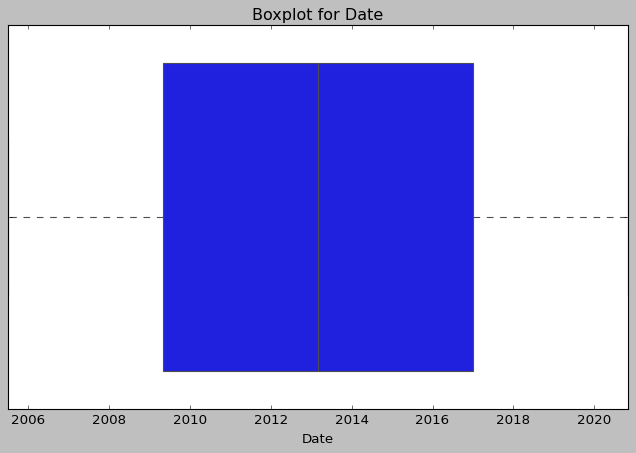

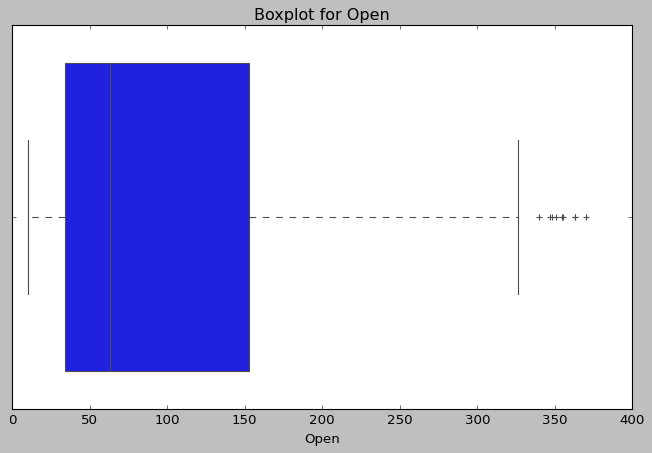

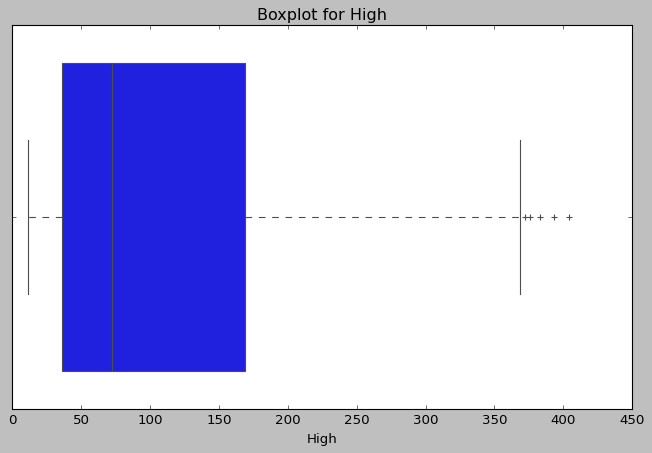

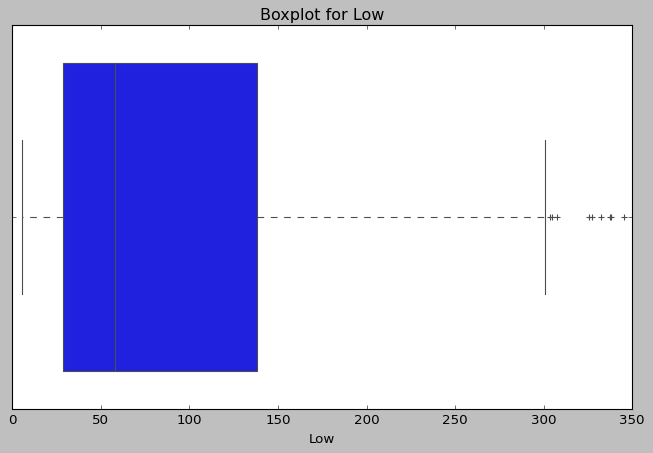

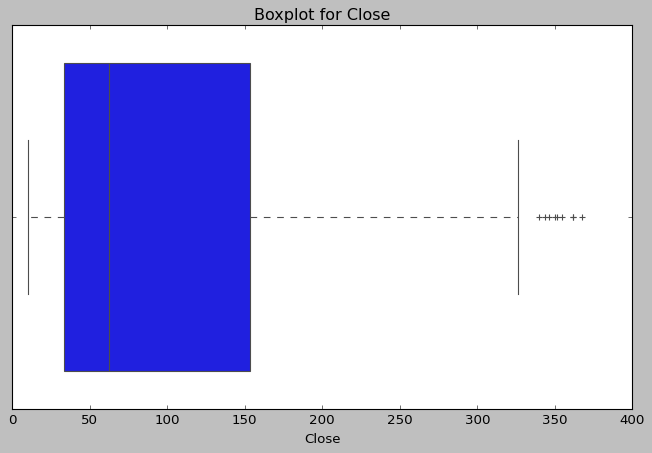

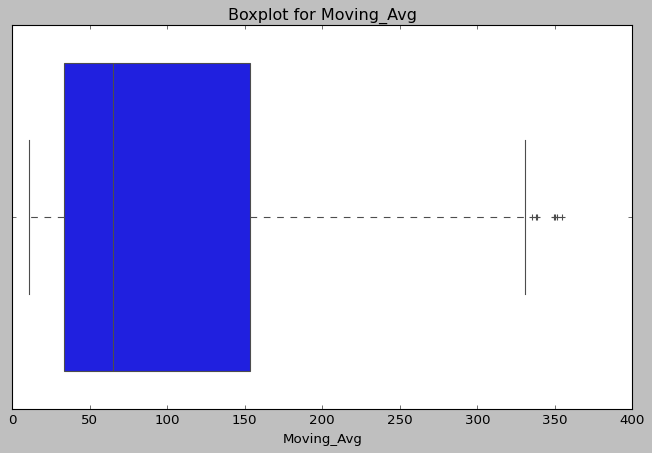

In [ ]:
# Handling Outliers & Outlier treatments
numerical_features = df_stock.select_dtypes(exclude='object').columns
# Plotting boxplots to visually inspect for outliers
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_stock[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()

In [ ]:
#remove outliers
for i in numerical_features:
  if df_stock[i].dtypes!='object':
    q1=df_stock[i].quantile(0.25)
    q3=df_stock[i].quantile(0.75)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    df_stock=df_stock[(df_stock[i]>=lb) & (df_stock[i]<=ub)]

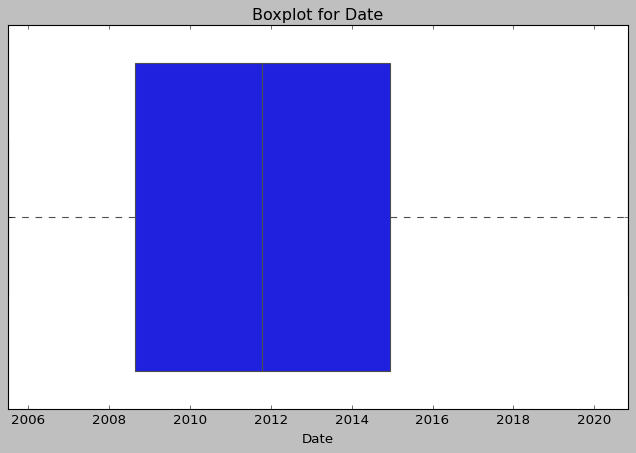

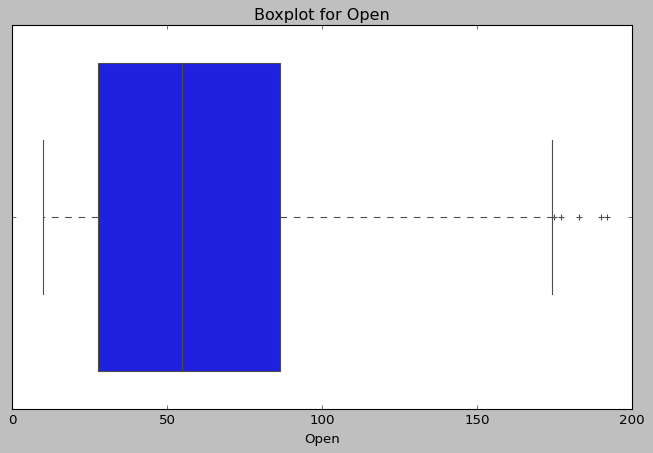

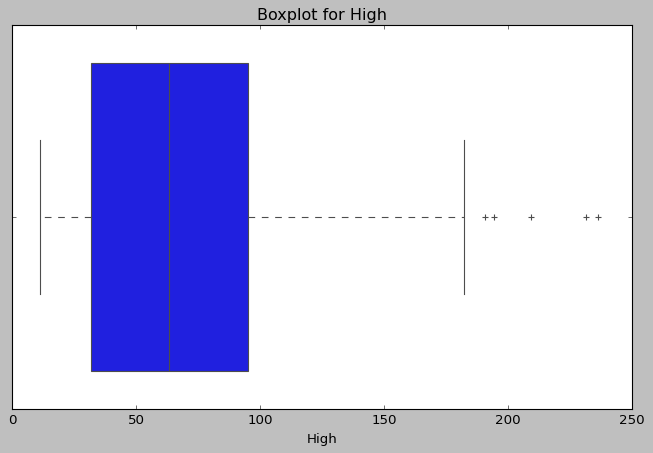

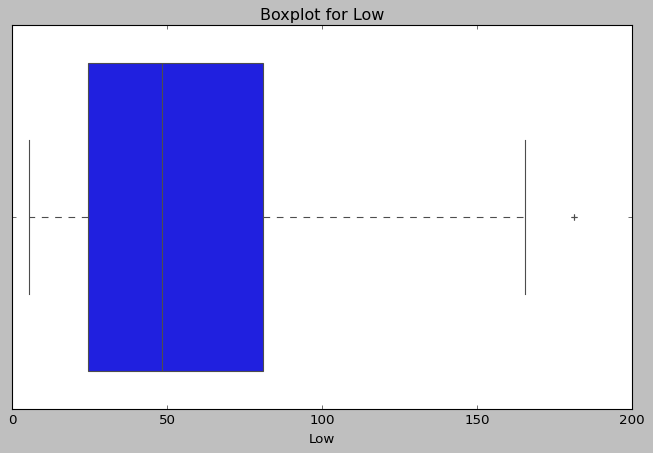

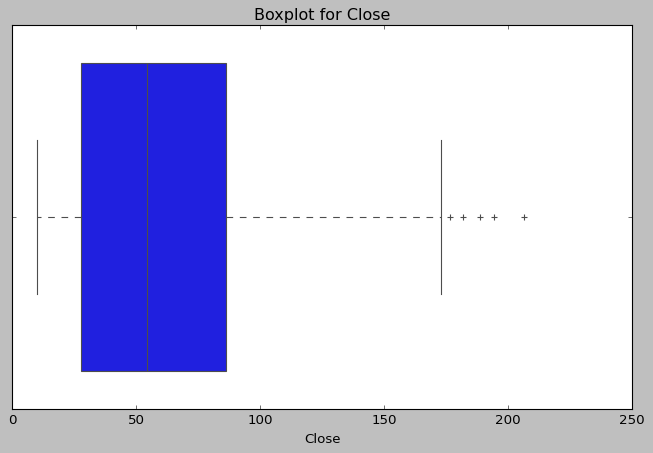

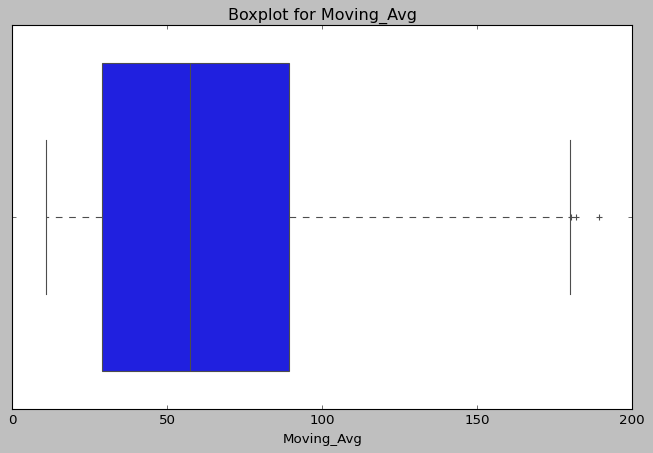

In [ ]:
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_stock[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.Z-Score – Removes values beyond ±3 standard deviations for normally distributed data. IQR Method – Detects outliers using percentiles (Q1 - 1.5×IQR, Q3 + 1.5×IQR), robust for skewed data. Winsorization (Capping) – Limits extreme values by replacing them with threshold values. Trimming – Removes extreme values completely if they are errors or irrelevant. Transformation (Log, Square Root, Box-Cox) – bold textReduces skewness and the impact of extreme values. Model-Based (Isolation Forest, DBSCAN) – Uses ML techniques to detect anomalies, useful for high-dimensional data.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
#done to 'Date'column

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.converted by pd.to_datetime(),it an pandas fn

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
#Convert Date to Datetime Format=DONE BEFORE

In [ ]:
# Extract Date-Based Features
#Once converted to datetime, new time-based features can be created:
df_stock["Year"] = df_stock["Date"].dt.year
df_stock["Month"] = df_stock["Date"].dt.month
df_stock["Day"] = df_stock["Date"].dt.day


In [ ]:
df_stock.head()

,Date,Open,High,Low,Close,Moving_Avg,Year,Month,Day
0,2005-07-01,13.00,14.00,11.25,12.46,106.208579,2005,7,1
1,2005-08-01,12.58,14.88,12.55,13.42,106.208579,2005,8,1
2,2005-09-01,13.48,14.87,12.27,13.30,13.060000,2005,9,1
3,2005-10-01,13.20,14.47,12.40,12.99,13.236667,2005,10,1
4,2005-11-01,13.35,13.88,12.88,13.41,13.233333,2005,11,1


In [ ]:
# Compute Daily Price Range (Volatility)
df_stock["Price_Range"] = df_stock["High"] - df_stock["Low"]

In [ ]:
df_stock.head()

,Date,Open,High,Low,Close,Moving_Avg,Year,Month,Day,Price_Range
0,2005-07-01,13.00,14.00,11.25,12.46,106.208579,2005,7,1,2.75
1,2005-08-01,12.58,14.88,12.55,13.42,106.208579,2005,8,1,2.33
2,2005-09-01,13.48,14.87,12.27,13.30,13.060000,2005,9,1,2.60
3,2005-10-01,13.20,14.47,12.40,12.99,13.236667,2005,10,1,2.07
4,2005-11-01,13.35,13.88,12.88,13.41,13.233333,2005,11,1,1.00


In [ ]:
#Compute Daily Returns
df_stock["Daily_Return"] = df_stock["Close"].pct_change()

In [ ]:
df_stock.head()

,Date,Open,High,Low,Close,Moving_Avg,Year,Month,Day,Price_Range,Daily_Return
0,2005-07-01,13.00,14.00,11.25,12.46,106.208579,2005,7,1,2.75,NaN
1,2005-08-01,12.58,14.88,12.55,13.42,106.208579,2005,8,1,2.33,0.077047
2,2005-09-01,13.48,14.87,12.27,13.30,13.060000,2005,9,1,2.60,-0.008942
3,2005-10-01,13.20,14.47,12.40,12.99,13.236667,2005,10,1,2.07,-0.023308
4,2005-11-01,13.35,13.88,12.88,13.41,13.233333,2005,11,1,1.00,0.032333


In [ ]:
#Calculate Rolling Averages
df_stock["MA_3"] = df_stock["Close"].rolling(window=3).mean()

In [ ]:
df_stock.head()

,Date,Open,High,Low,Close,Moving_Avg,Year,Month,Day,Price_Range,Daily_Return,MA_3
0,2005-07-01,13.00,14.00,11.25,12.46,106.208579,2005,7,1,2.75,NaN,NaN
1,2005-08-01,12.58,14.88,12.55,13.42,106.208579,2005,8,1,2.33,0.077047,NaN
2,2005-09-01,13.48,14.87,12.27,13.30,13.060000,2005,9,1,2.60,-0.008942,13.060000
3,2005-10-01,13.20,14.47,12.40,12.99,13.236667,2005,10,1,2.07,-0.023308,13.236667
4,2005-11-01,13.35,13.88,12.88,13.41,13.233333,2005,11,1,1.00,0.032333,13.233333


#### 2. Feature Selection

**(a) Remove Redundant Features**

In [ ]:
# Select your features wisely to avoid overfitting
#If Open, High, and Low are not needed for a specific analysis, they can be removed.
#If the Date column has been split into Year, Month, and Day, then Date itself may not be necessary.
#df_stock = df_stock.drop(columns=["Open", "High", "Low","Date"])

In [ ]:
df_stock.head()

,Date,Open,High,Low,Close,Moving_Avg,Year,Month,Day,Price_Range,Daily_Return,MA_3
0,2005-07-01,13.00,14.00,11.25,12.46,106.208579,2005,7,1,2.75,NaN,NaN
1,2005-08-01,12.58,14.88,12.55,13.42,106.208579,2005,8,1,2.33,0.077047,NaN
2,2005-09-01,13.48,14.87,12.27,13.30,13.060000,2005,9,1,2.60,-0.008942,13.060000
3,2005-10-01,13.20,14.47,12.40,12.99,13.236667,2005,10,1,2.07,-0.023308,13.236667
4,2005-11-01,13.35,13.88,12.88,13.41,13.233333,2005,11,1,1.00,0.032333,13.233333


**(b) Drop Rows with NaN (if necessary**)

In [ ]:
df_stock = df_stock.dropna()  # Removes NaN rows

In [ ]:
df_stock.head()

,Date,Open,High,Low,Close,Moving_Avg,Year,Month,Day,Price_Range,Daily_Return,MA_3
2,2005-09-01,13.48,14.87,12.27,13.30,13.060000,2005,9,1,2.60,-0.008942,13.060000
3,2005-10-01,13.20,14.47,12.40,12.99,13.236667,2005,10,1,2.07,-0.023308,13.236667
4,2005-11-01,13.35,13.88,12.88,13.41,13.233333,2005,11,1,1.00,0.032333,13.233333
5,2005-12-01,13.49,14.44,13.00,13.71,13.370000,2005,12,1,1.44,0.022371,13.370000
6,2006-01-01,13.68,17.16,13.58,15.33,14.150000,2006,1,1,3.58,0.118162,14.150000


**(c) Select Features for Modeling**

In [ ]:
#For predictive modeling (e.g., predicting Close price), relevant features like Price_Range, Moving_Avg, and Daily_Return can be selected.
features = ["Price_Range", "Moving_Avg", "Daily_Return","Date"]
df_stock_model = df_stock[features]

In [ ]:
df_stock_model

,Price_Range,Moving_Avg,Daily_Return,Date
2,2.60,13.060000,-0.008942,2005-09-01
3,2.07,13.236667,-0.023308,2005-10-01
4,1.00,13.233333,0.032333,2005-11-01
5,1.44,13.370000,0.022371,2005-12-01
6,3.58,14.150000,0.118162,2006-01-01
...,...,...,...,...
180,17.20,21.466667,-0.533203,2020-07-01
181,5.31,17.306667,0.202510,2020-08-01
182,2.59,13.156667,-0.084899,2020-09-01
183,1.90,13.313333,-0.055513,2020-10-01


In [ ]:
df_stock_model.shape

(150, 4)

##### What all feature selection methods have you used  and why?

Features Found Less Important

Open, High, Low	--Often redundant if Close and Price_Range are included.

Year	--Might not be useful unless analyzing long-term trends.

Day	--Less relevant unless dealing with intraday stock movements.

Answer Here.
1. Domain Knowledge-Based Selection (Manual Feature Selection)




Features like Open, High, and Low may not add much value if we are only concerned with the closing price (Close).

Date can be removed if we extract relevant time-based features (Year, Month, Day).

##### Which all features you found important and why?

Answer Here.Important Features Identified and Their Significance
After applying different feature selection methods, the following features were found to be important:

1. Moving_Avg ✅ (Important)
Why?

Moving averages help smooth out price fluctuations and reveal trends.
Strong correlation with Close price (as it is derived from it).
Often used in stock price prediction and technical analysis.
🔹 If correlation is very high (~0.9+), we might remove it to avoid redundancy.

2. Price_Range (High - Low) ✅ (Important)
Why?

Represents daily volatility, indicating stock price fluctuations.
Can be a good predictor of price movements.
Useful in financial modeling, especially for volatility-based strategies.
3. Daily_Return (Close Price Change Percentage) ✅ (Important)
Why?

Measures how much the stock price has changed.
Used in risk assessment and investment strategies.
Captures trends better than raw Close prices.
🔹 If variance is too low (i.e., price changes are minimal), it might be removed.

4. Month ✅ (Important for Seasonality Analysis)
Why?

Stock prices often show seasonal trends (e.g., market cycles, earnings reports).
Including this feature helps in time-series modeling.
🔹 If not using a time-series model, we might drop it.


Final Selected Features
✅ Moving_Avg, Price_Range, Daily_Return, and Month
❌ Dropped: Open, High, Low, Year, Day

In [ ]:
df_stock_model

,Price_Range,Moving_Avg,Daily_Return,Date
2,2.60,13.060000,-0.008942,2005-09-01
3,2.07,13.236667,-0.023308,2005-10-01
4,1.00,13.233333,0.032333,2005-11-01
5,1.44,13.370000,0.022371,2005-12-01
6,3.58,14.150000,0.118162,2006-01-01
...,...,...,...,...
180,17.20,21.466667,-0.533203,2020-07-01
181,5.31,17.306667,0.202510,2020-08-01
182,2.59,13.156667,-0.084899,2020-09-01
183,1.90,13.313333,-0.055513,2020-10-01


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
#Yes, data transformation may be needed depending on the type of analysis or model being applied. Here’s what can be done:
#1. Check for Scaling Needs (Feature Scaling)
#Price_Range varies from 1.00 to 17.20 (large range).
#Moving_Avg varies from ~13 to 21 (moderate range).
#Daily_Return has values in the range -0.53 to 0.20 (small range).

### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select only numerical columns (excluding 'Date')
features = ["Price_Range", "Moving_Avg", "Daily_Return"]
scaler = StandardScaler()

# Fit and transform only numerical columns
df_stock_model_scaled = df_stock_model.copy()  # Make a copy
df_stock_model_scaled[features] = scaler.fit_transform(df_stock_model_scaled[features])

# Display the result
print(df_stock_model_scaled.head())

   Price_Range  Moving_Avg  Daily_Return       Date
2    -0.908531   -1.121970     -0.143614 2005-09-01
3    -0.948509   -1.118255     -0.227138 2005-10-01
4    -1.029220   -1.118325      0.096350 2005-11-01
5    -0.996030   -1.115451      0.038437 2005-12-01
6    -0.834610   -1.099047      0.595350 2006-01-01


**Differencing to make data stationary**

In [ ]:
# 2. How to Apply Differencing?to make data stationary
# You can apply first-order differencing (subtracting previous values) like this:
df_stock_model_scaled_diff = df_stock_model_scaled.copy()

# Apply differencing to numerical columns
df_stock_model_scaled_diff[["Price_Range", "Moving_Avg", "Daily_Return"]] = df_stock_model_scaled_diff[
    ["Price_Range", "Moving_Avg", "Daily_Return"]
].diff()

# Drop the first row since differencing creates NaN for the first value
df_stock_model_scaled_diff = df_stock_model_scaled_diff.dropna()

print(df_stock_model_scaled_diff.head())

   Price_Range  Moving_Avg  Daily_Return       Date
3    -0.039978    0.003715     -0.083524 2005-10-01
4    -0.080710   -0.000070      0.323488 2005-11-01
5     0.033189    0.002874     -0.057913 2005-12-01
6     0.161421    0.016404      0.556913 2006-01-01
7    -0.151615    0.018998     -0.387372 2006-02-01



Identify ARIMA Parameters (p, d, q)
Use Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots

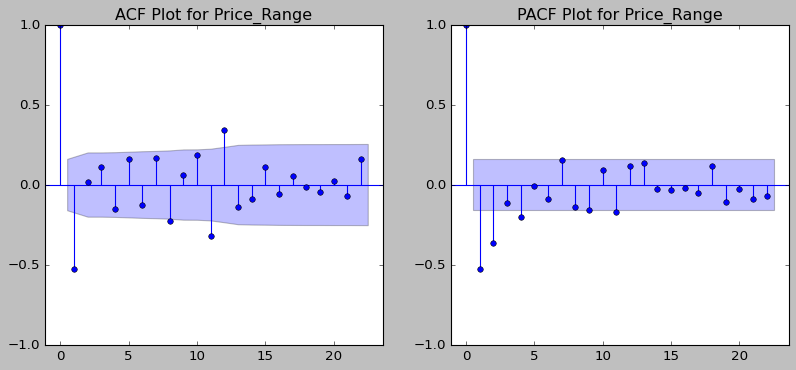

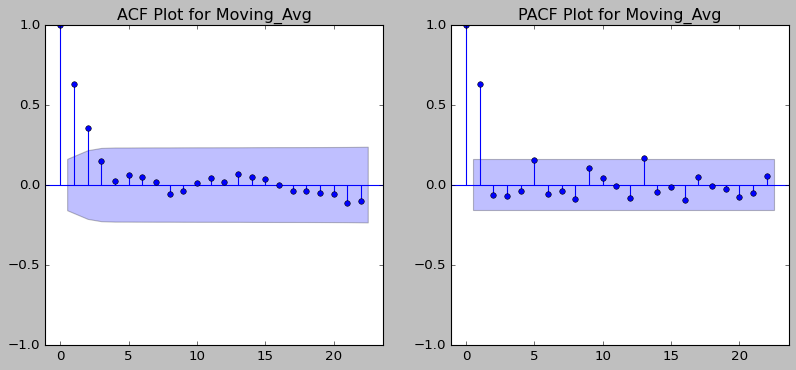

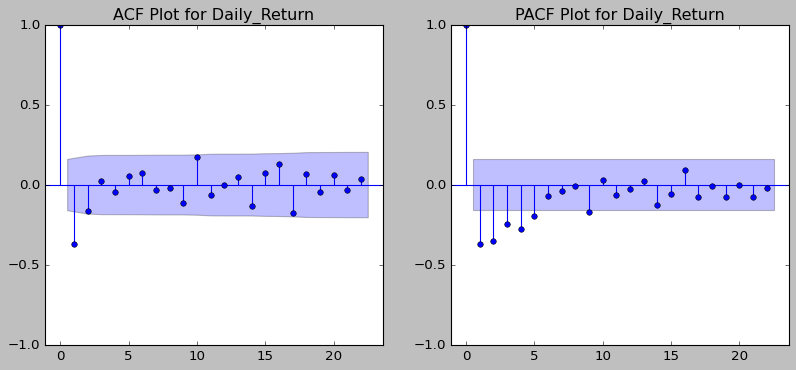

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Define the columns to analyze
features = ["Price_Range", "Moving_Avg", "Daily_Return"]

# Plot ACF and PACF for each differenced feature
for feature in features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # ACF Plot
    plot_acf(df_stock_model_scaled_diff[feature].dropna(), ax=axes[0])
    axes[0].set_title(f"ACF Plot for {feature}")

    # PACF Plot
    plot_pacf(df_stock_model_scaled_diff[feature].dropna(), ax=axes[1])
    axes[1].set_title(f"PACF Plot for {feature}")

    plt.show()
# p (AR order) → From PACF (cutoff point where it significantly drops).
# q (MA order) → From ACF (cutoff point where it significantly drops).
# d (Differencing order) → Number of times differencing is needed for stationarity.


##### Which method have you used to scale you data and why?
StandardScaler

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.NO NEED

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# After analyzing the ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots, you can proceed with ARIMA or SARIMA without explicitly splitting the data into X (features)
# and y (target). Time series forecasting models like ARIMA/SARIMA rely on past values of the series itself rather than external features. However, you should still follow a structured process:

# Steps to Proceed:
# Check ACF & PACF

# These plots help determine the order of the AR (p) and MA (q) terms for ARIMA/SARIMA.
# Train-Test Split (Optional, for Model Evaluation)

# While ARIMA and SARIMA use the entire time series, it is common to reserve a portion (e.g., last 20% of data) as a test set to validate performance.

In [ ]:
# # train_size = int(len(df_stock_model_scaled_diff) * 0.8)
# # train, test = df_stock_model_scaled_diff[:train_size], df_stock_model_scaled_diff[train_size:]
# train_size = int(len(df_stock_model_scaled_diff) * 0.8)
# train, test = df_stock_model_scaled_diff[:train_size], df[train_size:]

In [ ]:
# train.shape

In [ ]:
# test.shape

In [ ]:
# train.head()

In [ ]:
# test.head()

##### What data splitting ratio have you used and why?

Answer Here.train=80% and test=20%

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.Since your dataset involves time series forecasting (Price_Range, Moving_Avg, Daily_Return), you do not need SMOTE. Instead, focus on checking stationarity, choosing the right ARIMA/SARIMA parameters, and evaluating forecast accuracy

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1-ARIMA MODEL

**train/test split**

In [ ]:
df_stock_model_scaled_diff.shape

(149, 4)

In [ ]:
size=int(len(df_stock_model_scaled_diff)-30)

In [ ]:
size

119

In [ ]:
size = int(len(df_stock_model_scaled_diff) * 0.8)  # 80% train, 20% test

train = df_stock_model_scaled_diff.iloc[:size]  # First 80% for training
test = df_stock_model_scaled_diff.iloc[size:]   # Remaining 20% for testing

print(f"Training data size: {len(train)}")
print(f"Testing data size: {len(test)}")

Training data size: 119
Testing data size: 30


In [ ]:
# ML Model - 1 Implementation
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots
import matplotlib.pyplot as plt
p, d, q = 1, 1, 1
model = ARIMA(train['Price_Range'], order=(p, d, q))
arima_result = model.fit()
print(arima_result.summary())

# Fit the Algorithm

# Predict on the model

                               SARIMAX Results                                
Dep. Variable:            Price_Range   No. Observations:                  119
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -84.555
Date:                Wed, 05 Mar 2025   AIC                            175.111
Time:                        12:30:57   BIC                            183.423
Sample:                             0   HQIC                           178.486
                                - 119                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5585      0.079     -7.065      0.000      -0.713      -0.404
ma.L1         -0.9997      4.054     -0.247      0.805      -8.945       6.946
sigma2         0.2333      0.926      0.252      0.8

**MAKE PREDICTION**

In [ ]:
# Generate predictions
arima_predictions = arima_result.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Display predictions
print(arima_predictions)

119   -1.313509
120    0.770650
121   -0.393324
122    0.256739
123   -0.106312
124    0.096447
125   -0.016791
126    0.046451
127    0.011131
128    0.030857
129    0.019840
130    0.025993
131    0.022557
132    0.024476
133    0.023404
134    0.024002
135    0.023668
136    0.023855
137    0.023750
138    0.023809
139    0.023776
140    0.023794
141    0.023784
142    0.023790
143    0.023787
144    0.023788
145    0.023788
146    0.023788
147    0.023788
148    0.023788
Name: predicted_mean, dtype: float64


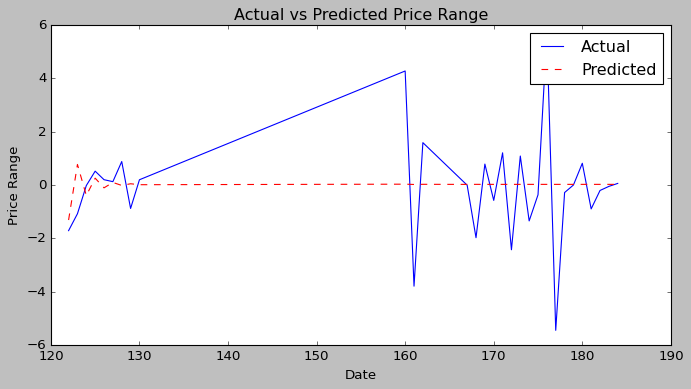

In [ ]:
import matplotlib.pyplot as plt

# Generate predictions
arima_predictions = arima_result.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Plot actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(test.index, test['Price_Range'], label='Actual', color='blue')
plt.plot(test.index, arima_predictions, label='Predicted', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Price Range')
plt.title('Actual vs Predicted Price Range')
plt.legend()
plt.show()

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**EVALUATE**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Generate predictions for ARIMA
arima_predictions = arima_result.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Compute evaluation metrics
arima_mae = mean_absolute_error(test['Price_Range'], arima_predictions)
arima_mse = mean_squared_error(test['Price_Range'], arima_predictions)
arima_rmse = np.sqrt(arima_mse)

print("ARIMA Model Performance:")
print(f"MAE: {arima_mae}")
print(f"MSE: {arima_mse}")
print(f"RMSE: {arima_rmse}")

ARIMA Model Performance:
MAE: 1.2735651362261546
MSE: 3.989040967225982
RMSE: 1.9972583626626732


### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

**SARIMA MODEL**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA order (modify P, D, Q, s as needed based on ACF/PACF)
p, d, q = 1, 1, 1  # Non-seasonal orders
P, D, Q, s = 1, 1, 1, 12  # Seasonal orders (s=12 for monthly data, adjust as needed)

# Fit SARIMA model
sarima_model = SARIMAX(train['Price_Range'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_result = sarima_model.fit()

# Print model summary
print(sarima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        Price_Range   No. Observations:                  119
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -88.165
Date:                            Wed, 05 Mar 2025   AIC                            186.331
Time:                                    12:30:59   BIC                            199.648
Sample:                                         0   HQIC                           191.728
                                            - 119                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5038      0.091     -5.514      0.000      -0.683      -0.325
ma.L1         -0.9985      2.226   

In [ ]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# import matplotlib.pyplot as plt
# # Define SARIMA model (example order and seasonal order, adjust as needed)
# sarima_model = SARIMAX(train['Price_Range'], order=(1,1,1), seasonal_order=(1,1,1,12))
# sarima_result = sarima_model.fit()

In [ ]:
# Generate predictions
predictions = sarima_result.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
predictions

,predicted_mean
119,-1.083297
120,0.773153
121,-0.453549
122,0.085770
123,0.352464
124,-0.364499
125,0.397418
126,-0.217658
127,0.210084
128,-0.105932


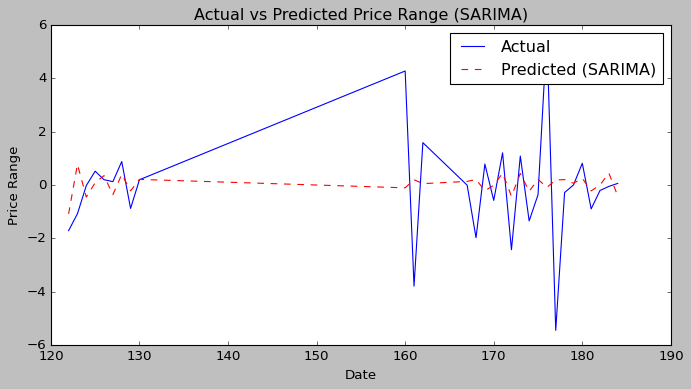

In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(10,5))
plt.plot(test.index, test['Price_Range'], label='Actual', color='blue')
plt.plot(test.index, predictions, label='Predicted (SARIMA)', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Price Range')
plt.title('Actual vs Predicted Price Range (SARIMA)')
plt.legend()
plt.show()

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**EVALUATE**

In [ ]:
# Generate predictions for SARIMA
sarima_predictions = sarima_result.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Compute evaluation metrics
sarima_mae = mean_absolute_error(test['Price_Range'], sarima_predictions)
sarima_mse = mean_squared_error(test['Price_Range'], sarima_predictions)
sarima_rmse = np.sqrt(sarima_mse)

print("\nSARIMA Model Performance:")
print(f"MAE: {sarima_mae}")
print(f"MSE: {sarima_mse}")
print(f"RMSE: {sarima_rmse}")


SARIMA Model Performance:
MAE: 1.28082695919583
MSE: 4.063102611446997
RMSE: 2.01571392103319


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Machine Learning Model Used: ARIMA & SARIMA
1. ARIMA (AutoRegressive Integrated Moving Average)
ARIMA is a statistical model used to analyze and forecast time series data. It consists of three main components:

AutoRegressive (AR): Uses past values to predict future values.
Integrated (I): Differencing is applied to make the data stationary.
Moving Average (MA): Uses past forecast errors to improve predictions.
p = 1 → One lag of past observations used.
d = 1 → One differencing step applied for stationarity.
q = 1 → One past error term considered in the model.

2.SARIMA extends ARIMA by accounting for seasonality in the data. It introduces seasonal components:

(P, D, Q, s) where:
P = Seasonal autoregressive order
D = Seasonal differencing order
Q = Seasonal moving average order
s = Seasonality period (e.g., 12 for monthly data)
The seasonal_order=(1,1,1,12) assumes:
12-month seasonality (since s=12).
Seasonal differencing (D=1) ensures stationarity.

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.
**Identify the model (ARIMA or SARIMA) with the lower RMSE**.

In [ ]:
# Save the File
#Identify the model (ARIMA or SARIMA) with the lower RMSE.
import pickle

# Determine the best model based on RMSE
if arima_rmse < sarima_rmse:
    best_model = arima_result
    model_name = "ARIMA"
else:
    best_model = sarima_result
    model_name = "SARIMA"

# Save the best model
model_filename = f"best_model_{model_name}.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(best_model, file)

print(f"Best model ({model_name}) saved as {model_filename}")

Best model (ARIMA) saved as best_model_ARIMA.pkl


**Load and Inspect the Saved Model**

In [ ]:
# Load the model (replace with the correct file name if needed)
model_filename = "best_model_ARIMA.pkl"  # or "best_model_SARIMA.pkl"
with open(model_filename, "rb") as file:
    best_model = pickle.load(file)

print(best_model)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***